<a href="https://colab.research.google.com/github/nassimsf/Exploratory-Data-Analysis-EDA-/blob/main/Exploratory_Data_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exploratory Data Analysis(EDA)**

## Data importing 

In [ ]:
df= pd.read_csv("link")


# **Part1 : data discovering**

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Maker              268255 non-null  object 
 1    Genmodel          268255 non-null  object 
 2    Genmodel_ID       268255 non-null  object 
 3   Adv_year           268255 non-null  int64  
 4   Adv_month          268255 non-null  int64  
 5   Color              268255 non-null  object 
 6   Reg_year           268255 non-null  float64
 7   Bodytype           268255 non-null  object 
 8   Runned_Miles       268255 non-null  int64  
 9   Engin_size         268255 non-null  object 
 10  Gearbox            268255 non-null  object 
 11  Fuel_type          268255 non-null  object 
 12  Price              268255 non-null  float64
 13  Seat_num           268255 non-null  float64
 14  Door_num           268255 non-null  float64
 15  issue              268255 non-null  object 
 16  is

,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,...,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,Label,category_anomaly,repair_date
0,Bentley,Arnage,10_1,2018,4,Silver,2000.0,Saloon,60000,6.8L,...,Starter Motor Issue,0,19,2018-04-19,3,395.000,9.0,0,0,2018-04-21
1,Bentley,Arnage,10_1,2018,6,Grey,2002.0,Saloon,44000,6.8L,...,Radiator Leaking,0,15,2018-06-15,3,695.000,6.0,0,0,2018-06-16
2,Bentley,Arnage,10_1,2017,11,Blue,2002.0,Saloon,55000,6.8L,...,Steering Wheel Shaking,0,10,2017-11-10,3,89.999,3.0,0,0,2017-11-10
3,Bentley,Arnage,10_1,2018,4,Green,2003.0,Saloon,14000,6.8L,...,Electrical Issue,4,14,2018-04-14,3,224.844,6.0,0,0,2018-04-15
4,Bentley,Arnage,10_1,2017,11,Grey,2003.0,Saloon,61652,6.8L,...,Windscreen Crack,0,6,2017-11-06,3,75.933,3.0,0,0,2017-11-06


In [ ]:
df["Label"].unique()

array([0, 1])

In [ ]:
df.isnull().sum()

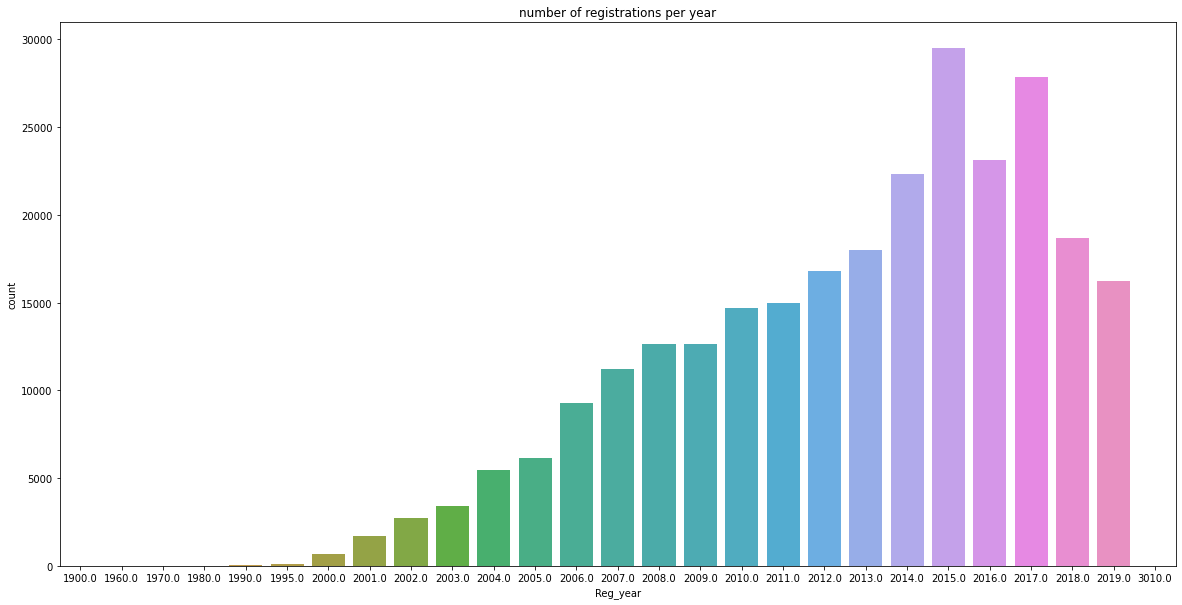

In [ ]:
plt.figure(figsize=(20,10))
plt.title("number of registrations per year")
sns.countplot(x = 'Reg_year' , data = df)

### **testing if the data is balanced or not**

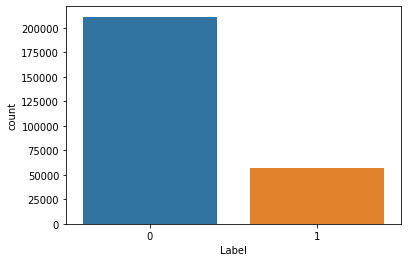

In [ ]:
sns.countplot(x = 'Label' , data = df)


In [ ]:
df.shape
df.columns

In [ ]:
Label=df.Label
Label.value_counts()

0    211506
1     56749
Name: Label, dtype: int64

we have an unbalanced data : the label 1's existing is less than 50% of the label 0 

###**testing the outliers in every feature**

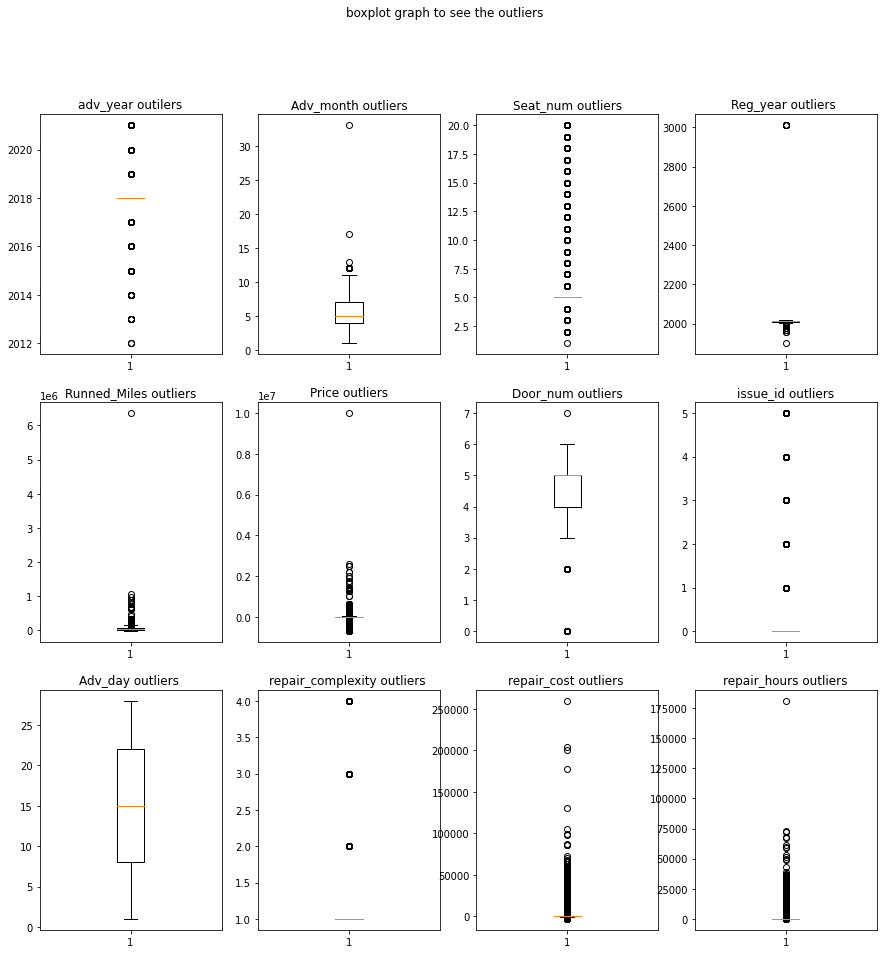

In [ ]:

fig, axs = plt.subplots(3, 4,figsize=(15,15))
axs[0, 0].boxplot(df["Adv_year"])
axs[0, 0].set_title('adv_year outilers')
axs[0, 1].boxplot(df["Adv_month"])
axs[0, 1].set_title('Adv_month outliers')
axs[1, 0].boxplot(df["Runned_Miles"])
axs[1, 0].set_title('Runned_Miles outliers')
axs[1, 1].boxplot(df["Price"])
axs[1, 1].set_title('Price outliers')
axs[0,2].boxplot(df["Seat_num"])
axs[0,2].set_title('Seat_num outliers')
axs[0,3].boxplot(df["Reg_year"])
axs[0,3].set_title('Reg_year outliers ')
axs[1,2].boxplot(df["Door_num"])
axs[1,2].set_title('Door_num outliers')
axs[1,3].boxplot(df["issue_id"])
axs[1,3].set_title("issue_id outliers")
axs[2,0].boxplot(df["Adv_day"])
axs[2,0].set_title("Adv_day outliers ")
axs[2,1].boxplot(df["repair_complexity"])
axs[2,1].set_title("repair_complexity outliers ")
axs[2,2].boxplot(df["repair_cost"])
axs[2,2].set_title("repair_cost outliers ")
axs[2,3].boxplot(df["repair_hours"])
axs[2,3].set_title("repair_hours outliers")
fig.suptitle("boxplot graph to see the outliers")
plt.show()



feature that have Upper Boundary outliers : Adv_month , Reg_year ,Runned_Miles ,Price , repaire hours , door_num

feature that have lower Boundary : door_num and reg_year 




## correlation matrix 

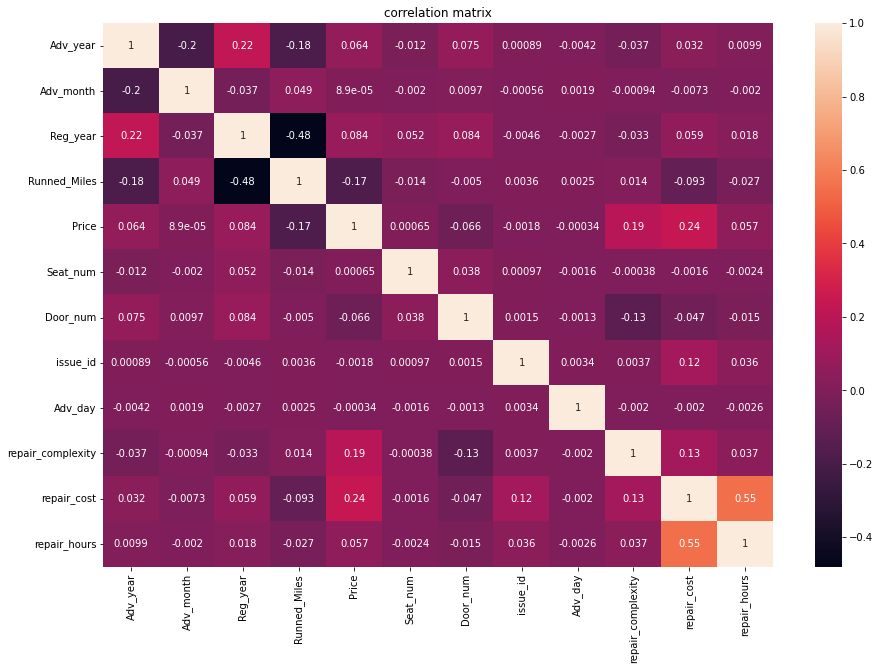

In [ ]:
df1=df.drop(columns=["Label","category_anomaly"])
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.title("correlation matrix")
plt.show()


taking a look to the columns that have object's type

In [ ]:
print("repaire date values")
df.repair_date.unique()
print("breakdown data values")
df.breakdown_date.unique()
print("fuel_type values")
df.Fuel_type.unique()
print("gearbox values")
df.Gearbox.unique()
print("bodytype values")
df.Bodytype.unique()
print("color values")
df.Color.unique()
print("genmodel_id values")
df[" Genmodel_ID"].unique()
print("genmodel values ")
df[" Genmodel"].unique()

Missing values



In [ ]:
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

In [ ]:
# Build a matrix of missing values
missingno.matrix(df, fontsize = 16)
plt.show()

Duplicates

In [ ]:
# Forming categorical columns
col_name_without_numeric_data = list(df.select_dtypes(exclude=('int', 'float')).columns)
print(f'Сolumns without numeric data: {", ".join(col_name_without_numeric_data)}.')

In [ ]:
# Let's see the duplicates in the columns
for col in col_name_without_numeric_data:
    if df[col].duplicated().any() == True:
        print (f'Column {col} contains duplicates.')
    else:
        print (f'Column {col} does not contain duplicates.')

Check if the columns contains words in different case and extra spaces.



In [ ]:
# Check if spelling errors have been hit
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(df[col]))} After {col}: {len(set(df[col].str.title().str.strip()))}')

if we have  typing errors in the a column. Let's fix it.

In [ ]:
# Correct the errors
df.Namecolumn = df.Namecolmun.str.title().str.strip()

In [ ]:
# Check if the changes have passed
for col in col_name_without_numeric_data:
    print(f'Before {col}: {len(set(df[col]))} After {col}: {len(set(df[col].str.title().str.strip()))}')

Let's check if there are the same author names but with different spellings.



In [ ]:
# Check the column Autor
namecolumn = df.namecolumn.sort_values().unique()
namecolumn

value of a column George R. R. Martin, George R.R. Martin and J. K. Rowling, J.K. Rowling have different spellings although they are the same value. Let's fix it.
(the values are an example)

In [ ]:
# Let's build a list of the most similar spellings
matches_author_name = fuzzywuzzy.process.extract('George R.R. Martin', authors, limit=5, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches_author_name

check a year column

In [ ]:
# Check the column Year
years = list(bestsellers.Year.unique())
sorted(years)


remove duplication


In [ ]:
# Remove duplicates and check how many values in a column are left in the data
df = df.drop_duplicates(keep='first')
df.info()

In [ ]:
# Let's count the number of each value of a column in the data
count_values = collections.Counter(df.namecolumn.tolist())
print(count_values.most_common(11))

Сheck with the example of a value : The first_value

In [ ]:
# Display information on The first_value 
bestsellers[bestsellers['Namecolumn'] == 'first_value']

and now you can if it logical to have more than a row with the same " first_value"

## Categorical data

in categorical data you to see relation between two features (the highest/ the most/ more /the lowest/ the frequency /top value)

making some variable to use it easily in the plots

In [ ]:
# We take all authors with the highest average rating
top_13_vlaue = df.groupby('Author')[['User Rating']].mean()\
                                                              .sort_values('User Rating', ascending=False)\
                                                              .head(13)\
                                                              .reset_index()
# We take the authors who have written the most bestsellers
number_of_books_written = df.groupby('Author')[['Name']].count()\
                                                                 .sort_values('Name', ascending=False)\
                                                                 .head(10)\
                                                                 .reset_index()

# We take books with the number of reviews
books_with_the_number_of_reviews = df.groupby('Name')[['Reviews']].sum()\
                                                                           .sort_values('Reviews', ascending=False)\
                                                                           .head(5)\
                                                                           .reset_index()

# We take the number of books by genre
number_of_books_by_genre = df.groupby('Genre')[['Name']].count()\
                                                                 .sort_values('Name', ascending=False)\
                                                                 .head(10)\
                                                                 .reset_index()

the code above is an exemple from an ancient project you only have to emplement it with your uses case and your variable 

In [ ]:
# Let's set the visualization parameters
fig_1 = make_subplots(rows=1, cols=1, subplot_titles=("")) # Let's set the number of rows and columns


# Setting table parameters
fig_1.add_trace(go.Table(columnorder = [1,2],
                         columnwidth = [100,50],
                         header=dict(values=top_13_autors.columns, 
                                     line_color='darkslategray',
                                     fill_color='Salmon',
                                     height=30),
                         cells=dict(values=[top_13_autors['Author'],
                                    top_13_autors['User Rating']], 
                                    line_color='darkslategray',
                                    fill_color='White')))

# Setting the parameters of the chart when displaying
fig_1.update_layout(showlegend=False, 
                    title_text='Top 13 best authors', 
                    title_font_size=16, 
                    title_font_family='Arial', 
                    title_x=0.5,
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_1.show()

# Let's set the visualization parameters
fig_2 = make_subplots(rows=1, cols=2,
                      specs=[[{'type': 'xy'}, {"type": "xy"}]],
                      subplot_titles=("Top 10 authors by number of bestsellers", 
                                      "Top 5 books by number of reviews"))

# Setting Bar parameters
fig_2.add_trace(go.Bar(x=number_of_books_written['Author'], 
                       y=number_of_books_written['Name'],
                       name ='Count books',
                       marker_color=['#ff6666','#f76e6e', '#f07575', '#e87d7d', '#e08585',
                                     '#d98c8c', '#d19494', '#c99c9c', '#c2a3a3', '#baabab']),
                       row=1, col=1)

# Setting Bar parameters
fig_2.add_trace(go.Bar(x=books_with_the_number_of_reviews['Name'], 
                       y=books_with_the_number_of_reviews['Reviews'],
                       marker_color=['#ff6666','#f47171', '#e87d7d', '#dd8888', '#d19494'],
                       name ='Reviews'),
                       row=1, col=2)

# Setting the parameters of the chart when displaying
fig_2.update_traces(marker_line_color='Gray',
                    marker_line_width=1)

# Setting the parameters of the chart when displaying
fig_2.update_layout(showlegend=False, 
                    plot_bgcolor='rgba(0,0,0,0)',
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_2.show()

# Let's set the visualization parameters
fig_3 = make_subplots(rows=1, cols=1,
                      specs=[[{'type': 'domain'}]],
                      subplot_titles=(""))

# Setting Pie parameters
fig_3.add_trace(go.Pie(values=number_of_books_by_genre['Name'],
                       title='Genre',
                       labels=['Non Fiction', 'Fiction'],
                       textinfo='label+percent',
                       insidetextorientation='radial',
                       hole=0.3,
                       marker=dict(colors=['Gray','Salmon'], 
                                   line_color='Gray', 
                                   line_width=1),
                       textfont={'color': '#FFFFFF', 'size': 12},
                       textfont_size=12))

# Setting the parameters of the chart when displaying
fig_3.update_layout(margin_t=30, 
                    showlegend=False, 
                    title_text='Count of books genre', 
                    title_x=0.5, 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig_3.show()

this will show you these relation graphs that we talked about

## numeric data

Let's look at the measures of the central trend that characterize the distribution of numerical values in the data. We render a box-plot for each numeric variable.

In [ ]:
df.describe()
#or df.describe().T

In [ ]:
# Let's set the visualization parameters
fig_4 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_4.add_trace(go.Box(x=df['User Rating'], 
                       name='User Rating'))

# Setting the parameters of the Box when displaying
fig_4.update_traces(marker_color='Salmon')

# Setting the parameters of the Box when displaying
fig_4.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Box
fig_4.show()

# Let's set the visualization parameters
fig_5 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_5.add_trace(go.Box(x=df['Reviews'], 
                       name='Reviews'))

# Setting the parameters of the Box when displaying
fig_5.update_traces(marker_color='Salmon')

# Setting the parameters of the Box when displaying
fig_5.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Box
fig_5.show()

# Let's set the visualization parameters
fig_6 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_6.add_trace(go.Box(x=df['Price'], 
                       name='Price'))

# Setting the parameters of the Box when displaying
fig_6.update_traces(marker_color='Salmon')

# Setting the parameters of the Box when displaying
fig_6.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Box
fig_6.show()

SO now you can analyze the numeric data how it is established:

Let's look at the correlation in the data.

In [ ]:
# Building a correlation matrix and building a correlation matrix and visualizing relationships
bestsellers.corr()

as well the constructed visualizations

In [ ]:
# Let's set the visualization parameters
fig_7 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Scatter parameters
fig_7.add_trace(go.Scattergl(x=bestsellers['User Rating'],
                             y=bestsellers['Reviews'],
                             mode='markers',
                             marker_color='salmon'))

# Setting the parameters of the Scatter when displaying
fig_7.update_layout(template='simple_white',
                    showlegend=False, 
                    xaxis = {'title':'User Rating'}, 
                    yaxis = {'title':'Reviews'},
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Scatter
fig_7.show()

# Let's set the visualization parameters
fig_8 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Scatter parameters
fig_8.add_trace(go.Scattergl(x=bestsellers['User Rating'],
                             y=bestsellers['Price'],
                             mode='markers',
                             marker_color='salmon'))

# Setting the parameters of the Scatter when displaying
fig_8.update_layout(template='simple_white',
                    showlegend=False,
                    xaxis = {'title':'User Rating'}, 
                    yaxis = {'title':'Price'},
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Scatter
fig_8.show()

# Let's set the visualization parameters
fig_9 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Scatter parameters
fig_9.add_trace(go.Scattergl(x=bestsellers['Price'],
                             y=bestsellers['Reviews'],
                             mode='markers',
                             marker_color='salmon'))

# Setting the parameters of the Scatter when displaying
fig_9.update_layout(template='simple_white',
                    showlegend=False, 
                    xaxis = {'title':'Price'}, 
                    yaxis = {'title':'Reviews'},
                    font=dict(family='Arial', size=12, color='black'))

# Displaying the Scatter
fig_9.show()

Based on the constructed correlation matrix as well as the constructed visualizations, it can be seen that the data if it  contains any positive or negative linear relationship between the 3 features

#**Part 2 :data cleaning** 

droping outliers 

function to drop 

In [ ]:
def drop_outliers(df, field_name):
  iqr=1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
  df.drop(df[df[field_name]>(iqr + np.percentile(df[field_name],75))].index, inplace=True)
  df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)


droping using the fuction

In [ ]:
drop_outliers(df,"namecolumn")


observing the result 

Text(0.5, 0.98, 'the result after droping the outliers')

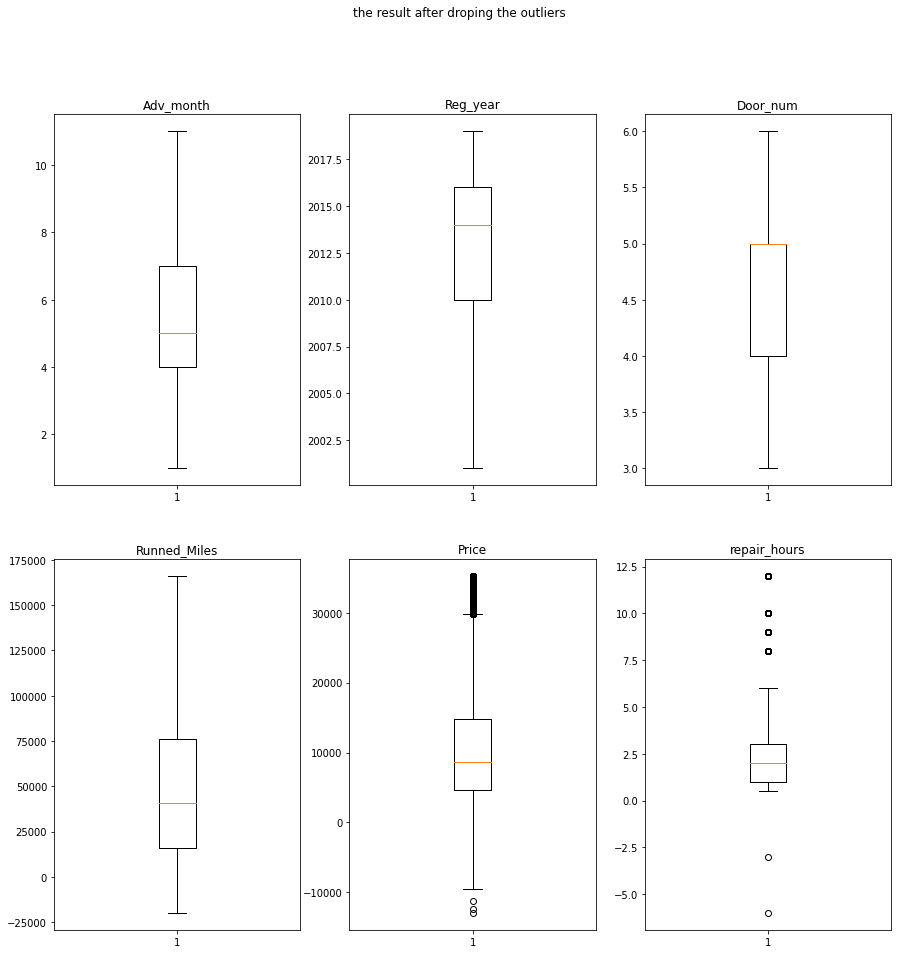

In [ ]:

fig, axs = plt.subplots(2,3,figsize=(15,15))
axs[0, 0].boxplot(df["Adv_month"])
axs[0, 0].set_title('Adv_month')
axs[0, 1].boxplot(df["Reg_year"])
axs[0, 1].set_title('Reg_year')
axs[1, 0].boxplot(df["Runned_Miles"])
axs[1, 0].set_title('Runned_Miles')
axs[1, 1].boxplot(df["Price"])
axs[1, 1].set_title('Price')
axs[1, 2].boxplot(df["repair_hours"])
axs[1, 2].set_title('repair_hours')
axs[0, 2].boxplot(df["Door_num"])
axs[0, 2].set_title('Door_num')
fig.suptitle("the result after droping the outliers")

replacing  the outliers  of a feature with the mean (the 24 condition is just for this problem )

In [ ]:
from statistics import mean
engin=df['Engin_size']
engin_int=[]
for i in engin:
    i=i[0:-1]
    i=float(i)
    engin_int.append(i)


s=([s for s in engin_int if s<=24.0 ])
moy=mean(s)
L=[]
for i in engin_int : 
  if i >24 : 
    L.append(moy)
  else : 
    L.append(i) 

x = np.array(L)
print(np.unique(L))


[ 0.1         0.3         0.6         0.66        0.7         0.8
  0.9         1.          1.1         1.2         1.25        1.3
  1.33        1.4         1.5         1.6         1.7         1.8
  1.9         1.93390544  2.          2.1         2.2         2.3
  2.4         2.5         2.6         2.7         2.8         2.9
  3.          3.1         3.2         3.3         3.4         3.5
  3.6         3.7         3.8         3.9         4.          4.2
  4.3         4.4         4.5         4.6         4.7         4.8
  4.9         5.          5.2         5.3         5.4         5.5
  5.7         5.8         5.9         6.          6.1         6.2
  6.3         6.4         6.5         6.6         6.7         6.75
  6.8         6.9         7.          8.          8.2        10.        ]


In [ ]:
df.drop(columns="Engin_size",axis=1,inplace=True)
df["Engin_size"]=L

# **Part3 :  Data Transformation**

converting the categorical "objects" to numeric "int32"

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
b= le1.fit_transform(df["Fuel_type"]) 
df["Fuel_type"] = b.reshape(-1,1)
c = le1.fit_transform(df["Gearbox"]) 
df["Gearbox"] = c.reshape(-1,1)
d = le1.fit_transform(df["Bodytype"]) 
df["Bodytype"]= d.reshape(-1,1)
e = le1.fit_transform(df["Color"]) 
df["Color"] = e.reshape(-1,1)
f = le1.fit_transform(df[" Genmodel_ID"]) 
df[" Genmodel_ID"] = f.reshape(-1,1)
g = le1.fit_transform(df[" Genmodel"]) 
df[" Genmodel"] = g.reshape(-1,1)
h = le1.fit_transform(df["issue"]) 
df["issue"] = h.reshape(-1,1)
i = le1.fit_transform(df["Maker"]) 
df["Maker"] = i.reshape(-1,1)


# **Part4 : Feature Engineering**

manipulating some date type 

In [ ]:
from datetime import datetime
breakdown_date=[]
for i in df["breakdown_date"]:
  breakdown_date.append(datetime.strptime(i, "%Y-%m-%d"))
breakdown_year=[]
breakdown_month=[]
breakdown_day=[]
for i in breakdown_date :
  breakdown_year.append(i.year)
  breakdown_month.append(i.month)
  breakdown_day.append(i.day)

In [ ]:
df["breakdown_year"]=breakdown_year
df["breakdown_month"]=breakdown_month
df["breakdown_day"]=breakdown_day

In [ ]:
from datetime import datetime
repair_date=[]
for i in df["repair_date"]:
  repair_date.append(datetime.strptime(i, "%Y-%m-%d"))
repair_year=[]
repair_month=[]
repair_day=[]
for i in repair_date :
  repair_year.append(i.year)
  repair_month.append(i.month)
  repair_day.append(i.day)
df["repair_year"]=repair_year
df["repair_month"]=repair_month
df["repair_day"]=repair_day

In [ ]:
df.drop(columns="breakdown_date",axis=1,inplace=True)
df.drop(columns="repair_date",axis=1,inplace=True)

also converting some time to timestamps

In [ ]:
from datetime import datetime
time=[]

for i in df["timestamp"]:
    d=i[:-7]
    sdate=(datetime.strptime(d, "%Y-%m-%d %H:%M:%S"))
    time.append(sdate.timestamp())

if you want to sort ur data by the timestamps 

In [ ]:
df.sort_values(by=["timestamp"],axis=0,inplace=False,kind='quicksort')

In [ ]:
df.info()

As we can see all our data are  non_null ,  all numeric annd all the outilers are cleaned 
==>we can pass the last part wich is model building 

# **Part5 : model building (XGBOOST)**

feature extraction

In [ ]:
label=df["Label"]
features=df.drop(columns="Label",axis=1,inplace=False)
from sklearn.model_selection import train_test_split
data_train, data_test, label_train , label_test = train_test_split(features,label,test_size=0.33,random_state=1)

model building, training , prediction

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(data_train, label_train)
pred = model.predict(data_test)

Testing the prediction occuracy 

In [ ]:
from sklearn.metrics import accuracy_score
ACC = accuracy_score(label_test, pred)*100
print(ACC)

98.41651603650976
